# [Tutorial] Introduction to Python Requests Module

## Reference
RealPython : [Python's Requests Library (Guide)](https://realpython.com/python-requests/)


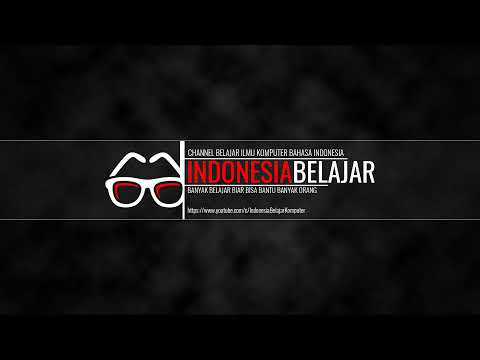

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("BmBgONJBX4g")

## Required Modules

In [2]:
!pip install requests

In [3]:
import requests

## Quick Start

In [4]:
response = requests.get("https://api.github.com")

In [5]:
type(response)

requests.models.Response

In [6]:
# response
print(response)

<Response [200]>


## HTTP Status Codes

Reference: [Wikipedia](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)

In [7]:
response = requests.get("https://api.github.com")
# response = requests.get("https://api.github.com/invalid")

response.status_code

200

In [8]:
if response.status_code == 200:
    print("Success!")
elif response.status_code == 404:
    print("Not Found.")

Success!


##### If you use a `Response` instance in a conditional expression, then it’ll evaluate to `True` if the status code was smaller than `400`, and `False` otherwise.

In [9]:
if response:
    print("Success!")
else:
    print(f"Non-success status code: {response.status_code}")

Success!


##### Using Request’s built-in capacities to raise an exception.

In [10]:
import requests
from requests.exceptions import HTTPError

# url = "https://api.github.com"
url = "https://api.github.com/invalid"

try:
    response = requests.get(url)
    response.raise_for_status()
except HTTPError as http_err:
    print(f"HTTP error occurred: {http_err}")
except Exception as err:
    print(f"Other error occurred: {err}")
else:
    print("Success!")

HTTP error occurred: 404 Client Error: Not Found for url: https://api.github.com/invalid


## Response Content

In [11]:
response = requests.get("https://api.github.com")
response.content

b'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","label_sea

In [12]:
type(response.content)

bytes

In [13]:
response.text

'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","label_sear

In [14]:
type(response.text)

str

In [15]:
response.json()

{'current_user_url': 'https://api.github.com/user',
 'current_user_authorizations_html_url': 'https://github.com/settings/connections/applications{/client_id}',
 'authorizations_url': 'https://api.github.com/authorizations',
 'code_search_url': 'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}',
 'commit_search_url': 'https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}',
 'emails_url': 'https://api.github.com/user/emails',
 'emojis_url': 'https://api.github.com/emojis',
 'events_url': 'https://api.github.com/events',
 'feeds_url': 'https://api.github.com/feeds',
 'followers_url': 'https://api.github.com/user/followers',
 'following_url': 'https://api.github.com/user/following{/target}',
 'gists_url': 'https://api.github.com/gists{/gist_id}',
 'hub_url': 'https://api.github.com/hub',
 'issue_search_url': 'https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}',
 'issues_url': 'https://api.github.com/issues',
 'keys_url': '

In [16]:
type(response.json())

dict

In [17]:
response_dict = response.json()
response_dict.keys()

dict_keys(['current_user_url', 'current_user_authorizations_html_url', 'authorizations_url', 'code_search_url', 'commit_search_url', 'emails_url', 'emojis_url', 'events_url', 'feeds_url', 'followers_url', 'following_url', 'gists_url', 'hub_url', 'issue_search_url', 'issues_url', 'keys_url', 'label_search_url', 'notifications_url', 'organization_url', 'organization_repositories_url', 'organization_teams_url', 'public_gists_url', 'rate_limit_url', 'repository_url', 'repository_search_url', 'current_user_repositories_url', 'starred_url', 'starred_gists_url', 'topic_search_url', 'user_url', 'user_organizations_url', 'user_repositories_url', 'user_search_url'])

In [18]:
response_dict["emails_url"]

'https://api.github.com/user/emails'

## Response Headers

In [19]:
response = requests.get("https://api.github.com")
response.headers

{'Server': 'GitHub.com', 'Date': 'Sat, 09 Mar 2024 16:02:37 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept, Accept-Encoding, Accept, X-Requested-With', 'ETag': 'W/"4f825cc84e1c733059d46e76e6df9db557ae5254f9625dfe8e1b09499c449438"', 'X-GitHub-Media-Type': 'github.v3; format=json', 'x-github-api-version-selected': '2022-11-28', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '0', 'Referrer-Policy': 'origin-when-cross-origin, strict-origin-when-cross-o

In [20]:
type(response.headers)

requests.structures.CaseInsensitiveDict

In [21]:
response.headers["Content-Type"]
# response.headers["content-type"]

'application/json; charset=utf-8'

## Query String Parameters

In [22]:
# Search GitHub's repositories for popular Python projects
params = {"q": "language:python", "sort": "stars", "order": "desc"}
response = requests.get("https://api.github.com/search/repositories", params=params)

# Inspect some attributes of the first three repositories
json_response = response.json()
popular_repositories = json_response["items"]
for repo in popular_repositories[:3]:
    print(f"Name: {repo['name']}")
    print(f"Description: {repo['description']}")
    print(f"Stars: {repo['stargazers_count']}")
    print()

Name: public-apis
Description: A collective list of free APIs
Stars: 284701

Name: system-design-primer
Description: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.
Stars: 248453

Name: awesome-python
Description: An opinionated list of awesome Python frameworks, libraries, software and resources.
Stars: 200327



## Request Headers

In [23]:
requests.get?

Signature: requests.get(url, params=None, **kwargs)
Docstring:
Sends a GET request.

:param url: URL for the new :class:`Request` object.
:param params: (optional) Dictionary, list of tuples or bytes to send
    in the query string for the :class:`Request`.
:param \*\*kwargs: Optional arguments that ``request`` takes.
:return: :class:`Response <Response>` object
:rtype: requests.Response
File:      ~/anaconda3/envs/python310/lib/python3.10/site-packages/requests/api.py
Type:      function

In [24]:
response = requests.get(
    url="https://api.github.com/search/repositories",
    params={"q": '"real python"'},
    headers={"Accept": "application/vnd.github.text-match+json"},
)

# View the new `text-matches` list which provides information
# about your search term within the results
json_response = response.json()
first_repository = json_response["items"][0]
print(first_repository["text_matches"][0]["matches"])

[{'text': 'Real Python', 'indices': [23, 34]}]


## Message Body

##### According to the HTTP specification, `POST`, `PUT`, and the less common `PATCH` requests pass their data through the `message body` rather than through `parameters` in the `query string`. Using `Requests` module, you’ll pass the payload to the corresponding function’s `data` parameter.

In [25]:
response = requests.post("https://httpbin.org/post", data={"key": "value"})
response.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'key': 'value'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Content-Length': '9',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.31.0',
  'X-Amzn-Trace-Id': 'Root=1-65ec8821-3e5a4d9423adfd01239cfd41'},
 'json': None,
 'origin': '202.80.217.107',
 'url': 'https://httpbin.org/post'}

##### If you need to send `JSON` data, then you can use the `json` parameter. When you pass JSON data via json, Requests will serialize your data and add the correct `Content-Type` header for you.

In [26]:
response = requests.post("https://httpbin.org/post", json={"key": "value"})
response.json()

{'args': {},
 'data': '{"key": "value"}',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Content-Length': '16',
  'Content-Type': 'application/json',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.31.0',
  'X-Amzn-Trace-Id': 'Root=1-65ec8822-52823f8e70d956003a0dc260'},
 'json': {'key': 'value'},
 'origin': '202.80.217.107',
 'url': 'https://httpbin.org/post'}

## Request Inspection

##### When you make a request, the `Requests` library prepares the request before actually sending it to the destination server. 

In [27]:
response = requests.post("https://httpbin.org/post", json={"key":"value"})

In [28]:
type(response.request)

requests.models.PreparedRequest

In [29]:
response.request.headers

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Length': '16', 'Content-Type': 'application/json'}

In [30]:
response.request.url

'https://httpbin.org/post'

In [31]:
response.request.body

b'{"key": "value"}'

## Authentication

Authentication helps a service understand who you are. Typically, you provide your credentials to a server by passing data through the `Authorization` header or a custom header defined by the service. All the functions of Requests that you’ve seen to this point provide a parameter called `auth`, which allows you to pass your credentials:

In [32]:
response = requests.get(
    url="https://httpbin.org/basic-auth/user/passwd",
    auth=("user", "passwd")
)

In [33]:
response.status_code

200

In [34]:
response.request.headers

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Authorization': 'Basic dXNlcjpwYXNzd2Q='}

##### Base64 Encoding

In [35]:
import base64
plain_data = "user:passwd".encode("utf-8")
base64.b64encode(plain_data).decode("utf-8")

'dXNlcjpwYXNzd2Q='

## Timeout

By default, `Requests` will wait indefinitely on the response, so you should almost always specify a timeout duration to prevent these issues from happening. To set the request’s timeout, use the `timeout` parameter. timeout can be an `integer` or `float` representing the number of `seconds` to wait on a response before timing out.

In [36]:
response = requests.get("https://api.github.com", timeout=1)
response 

<Response [200]>

In [37]:
response = requests.get("https://api.github.com", timeout=3.05)
response

<Response [200]>

## End of Tutorial

Salam Indonesia Belajar<br/>
Banyak Belajar Biar bisa Bantu Banyak Orang<br/>
[https://www.youtube.com/@belajaridn](https://www.youtube.com/@belajaridn)